<a href="https://colab.research.google.com/github/Noahkandie/KNN-Titanic-Naive-Bayes-Spam-Project/blob/main/Naive_Bayes_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview
This week's project requires us to implement a Naive Bayes classifier on the Spambase dataset. Once we conduct the experiments, we will calculate the resulting metrics

## Research Question
We are expected to use Naive Bayes to predict whether a message is marked as spam or not.



For our metric of success we will use:

    Accuracy score or AUC-ROC Score where Accuracy: Percentage of correctly identified spam and not spam message

    Classification report which consists of:

(i) Recall: Percentage spam message manage to block

(ii) Precision: Percentage of correct message for spam e-mail

(iii) F-Score: Weighted average of precision and recall

    Confusion matrix

(i) False Positive Rate (FP): The number of misclassified non spam emails

(ii) False Negative Rate (FN): The number of misclassified spam emails

(iii) True Positive (TP): The number of spam messages are correctly classified as spam

(iv) True Negative (TN): The number of non-spam e-mail that is correctly classified as non-spam


## Context
This dataset is from UCI machine learning repository, and we're going to use it to classiy whether an email is spam or not. Source: https://archive.ics.uci.edu/ml/datasets/Spambase


SPAMBASE was taken from UCI machine learning repository and was created by Mark Hopkins, Erik Reeber, George Forman, and Jaap Suermondt. This dataset contains 4601 email messages and 58 attributes. This dataset collection of non-spam email came from filled work, personal e-mail and single e-mail account. This dataset is composed of a selection of mail messages, suitable for use in testing spam filtering systems. Each instance in SPAMBASE consists of 58 attributes. Most of the attributes represent the frequency of a given word or character in the email that corresponds to the instance.

Variable Notes

    spam denotes whether the e-mail was considered spam (1) or not (0)

    Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.

    The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.


## Reading the data

In [8]:
# loading basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# geting the names from the spambase.names file
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

df = pd.read_csv('spambase.csv', names = names)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Checking the data

In [10]:
# Previewing the top of our dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
# Previewing the bottom of our dataset
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [12]:
# Previewing a sample(5) of our dataset
df.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2763,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,4.76,0.0,0.00,0.0,0.0,0.0,0.00,0.00,4.76,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.76,0.0,0.00,4.76,0.000,0.000,0.000,0.000,0.000,0.000,1.800,5,9,0
2050,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.76,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.76,0.0,0.0,0.0,0.00,0.00,0.76,0.0,0.76,0.0,0.0,0.0,0.76,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000,0.123,0.123,0.000,0.000,0.123,3.700,28,148,0
2599,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.81,0.0,0.0,0.0,0.35,0.0,0.35,0.35,0.0,0.00,0.0,0.0,0.0,0.35,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000,0.293,0.000,0.000,0.000,0.000,1.226,5,146,0
3309,0.0,0.0,0.57,0.0,0.85,0.0,0.0,0.0,0.28,0.00,0.57,0.28,0.0,0.0,0.0,0.85,0.0,0.57,1.42,0.0,0.85,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.080,0.000,0.000,0.282,0.242,0.000,2.460,26,278,0
3259,0.0,0.0,0.61,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.84,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.61,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.61,0.00,0.079,0.158,0.000,0.000,0.000,0.000,2.508,17,143,0


In [13]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

4601 Records and 58 columns.  We have a numerical dataset with majority of the columns being of float datatype

Tidying the Dataset

In [14]:
# Check for nulls
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

No missing data.

In [15]:
# Check for duplicates
df.duplicated().value_counts()

False    4210
True      391
dtype: int64

We have a number of duplicates, lets preview them

In [16]:
df[df.duplicated()][:5]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1


We are going to drop the duplicated records since theyre few, < 10% of the total number of rows.

In [17]:
df.drop_duplicates(inplace=True)
df.shape


(4210, 58)

In [18]:
df['spam']=df['spam'].astype('category')

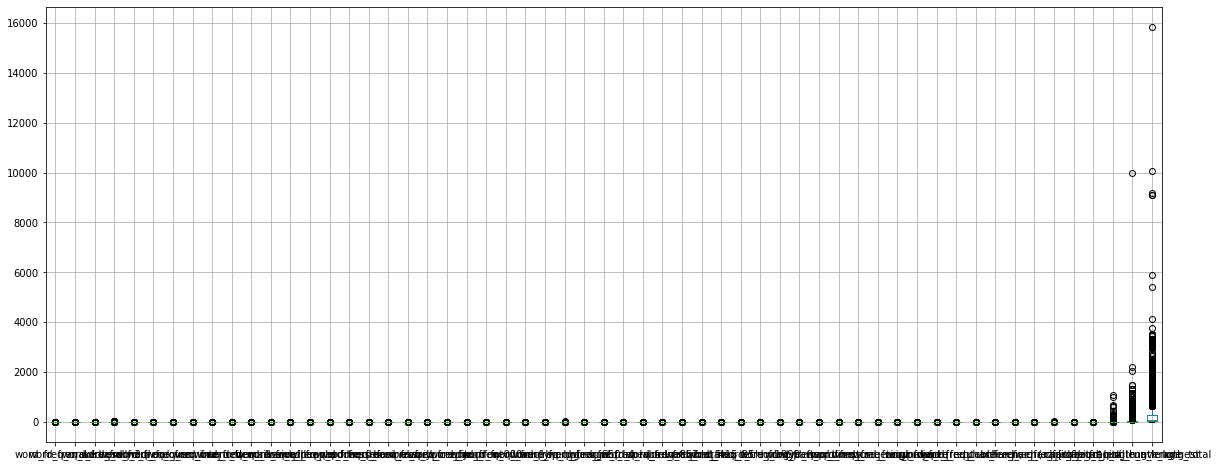

In [19]:
# Check for outliers
df.boxplot(figsize=(20,8))

Since the feature variables are a lot, we shall not focus on outliers

## Exploratory Data Analysis

In [20]:
# Describe the Data 
df.describe(include='all')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2531.0
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,NaN
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

0    2531
1    1679
Name: spam, dtype: int64


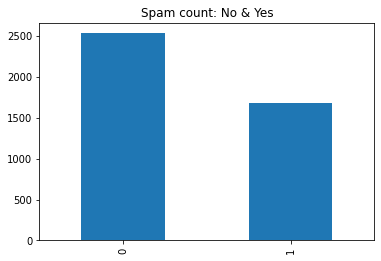

In [21]:
#Ratio of spam vs non-spam emails
abc=df['spam'].value_counts()
print(abc)
abc.plot.bar(title='Spam count: No & Yes')

Messages not marked spam outnumber those marked spam 2531 to 1679.

In [22]:
# selecting random variables to view their distributions since there are too many variables
# to do them all
import random
dist = random.sample(names, k = 10)
dist

['word_freq_re',
 'word_freq_addresses',
 'word_freq_parts',
 'char_freq_!',
 'word_freq_order',
 'word_freq_hpl',
 'word_freq_your',
 'word_freq_font',
 'word_freq_over',
 'word_freq_85']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


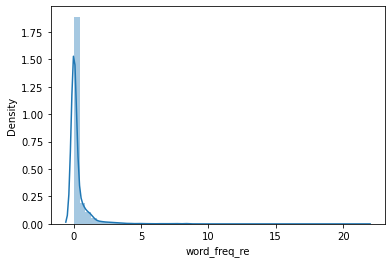

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


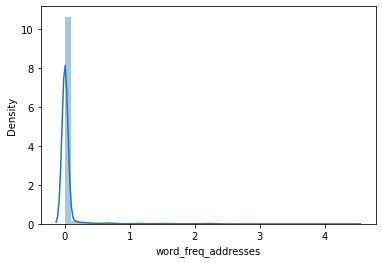

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


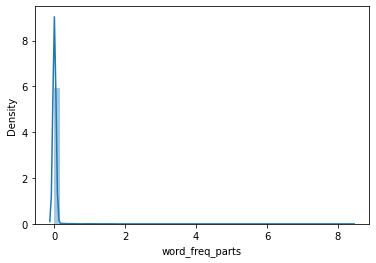

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


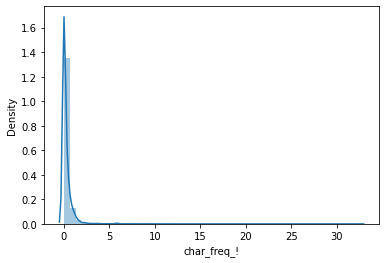

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


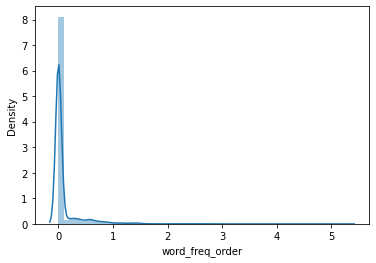

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


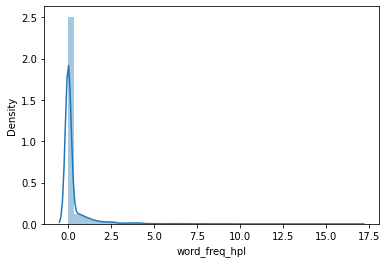

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


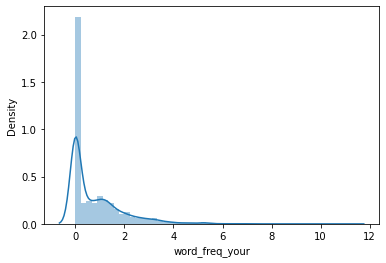

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


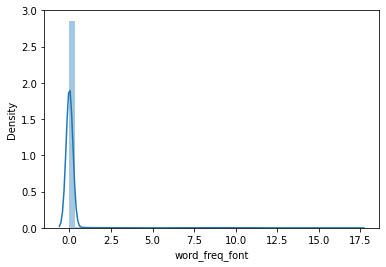

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


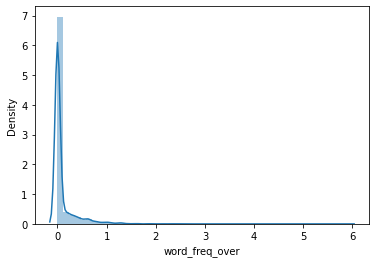

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


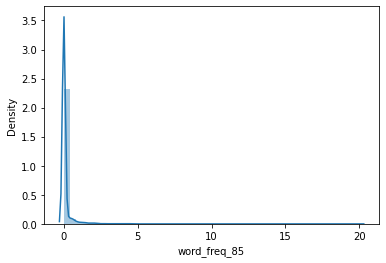

In [23]:
# Plotting distribution of features
for item in dist:
    sns.distplot(df[item])
    plt.show()

From what we can see, it appears that all the variables are positively skewed. We cannot use Multinomial Naive Bayes classifier with this dataset because it requires that our features' data should be discrete and nominal, which they clearly are not. We cannot use Bernoulli NB because it requires that all the features in in our dataset should have binary values, which, clearly isn't the case. So we are left with Gaussian Naive Bayes, which we will use for our model. Still we will carry out analysis but our model focus is on the Gaussian

## Implementing the Solution

In [24]:
# Separate features from target
X=df.drop('spam',axis=1).values
y=df.spam.values



In [25]:
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((3368, 57), (3368,))

Gaussain Model

Since our data is imbalanced we will not use accuracy score as a perfomance metric intead we will use ROC_AUC_Score

In [26]:
#Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#Perfomance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [27]:
#Training and fitting the model
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# y_expect = y_test
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)


#Checking performance our model with performance metrics.

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, y_pred))
print('ROC Score:',roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix
[[357 138]
 [ 13 334]]


Classification report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842

ROC Score: 0.8418740721334381
Accuracy: 0.8206650831353919


From the confusion matrix, our model has misclassified on 151 data points and has a roc_auc score of 84.187%

Multinomial Model

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
ym_pred = mnb.predict(X_test)

#Checking performance our model with performance metrics.

print('Confusion Matrix')
print(confusion_matrix(y_test, ym_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, ym_pred))
print('ROC Score:',roc_auc_score(y_test, ym_pred))
print("Accuracy:", accuracy_score(y_test, ym_pred))

Confusion Matrix
[[415  80]
 [114 233]]


Classification report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842

ROC Score: 0.754926789508922
Accuracy: 0.7695961995249406


Both the Roc and Accuracy scores are lower in the multinomial model. The model misclassified 194 data points which was higher than the Gaussian model. We can assume the data does not follow a multinomial distribution

Binomial Distribution.

In [29]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
print(bnb)

yb_pred = bnb.predict(X_test)

#Checking performance our model with performance metrics.

print('Confusion Matrix')
print(confusion_matrix(y_test, yb_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, yb_pred))
print('ROC Score:',roc_auc_score(y_test, yb_pred))
print("Accuracy:", accuracy_score(y_test, yb_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Confusion Matrix
[[457  38]
 [ 54 293]]


Classification report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       495
           1       0.89      0.84      0.86       347

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.89       842
weighted avg       0.89      0.89      0.89       842

ROC Score: 0.8838063633452682
Accuracy: 0.8907363420427553


From the confusion matrix, our model has misclassified on 92 data points and has a roc_auc score of 88.38%. Given that the data doesnt follow a bernoulli distribution we are going to use Gaussian model and optimize it

## Challenging the Solution

Check for Multicollinearity

Text(0.5, 1.0, 'Correlation heatmap')

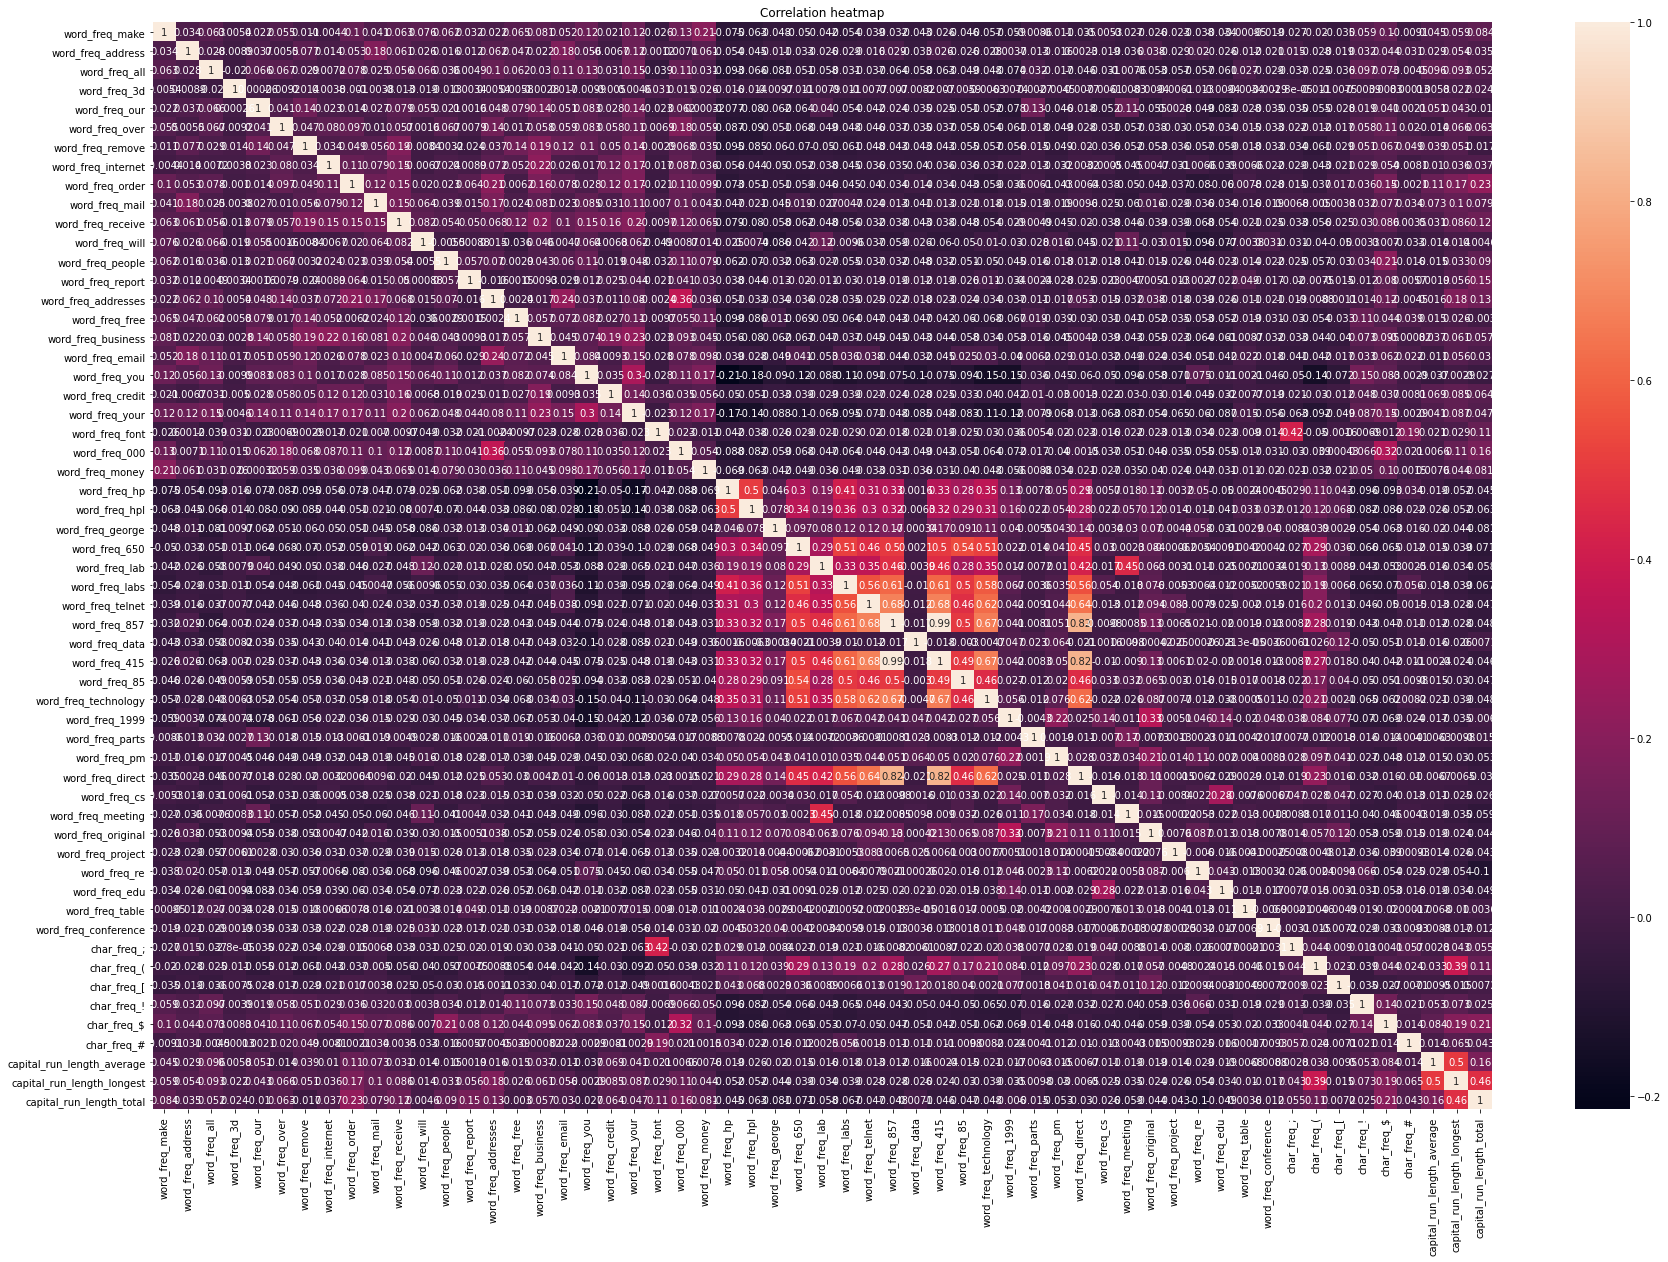

In [31]:
# plot a correlation heatmap
corr=df.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(corr,annot =True)
plt.title('Correlation heatmap')


While it is hard to read the heatmap due to the high number of variables, we can see a the variables in the center of the graph are lightly coloured hinting high corelation. We re-plot using the variables in the middle

In [32]:
corr>0.5

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_address,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_all,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_3d,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_our,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_over,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_remove,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_internet,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
word_freq_order,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

From the table we get the feature at the area of interest

Text(0.5, 1.0, 'Correlation heatmap')

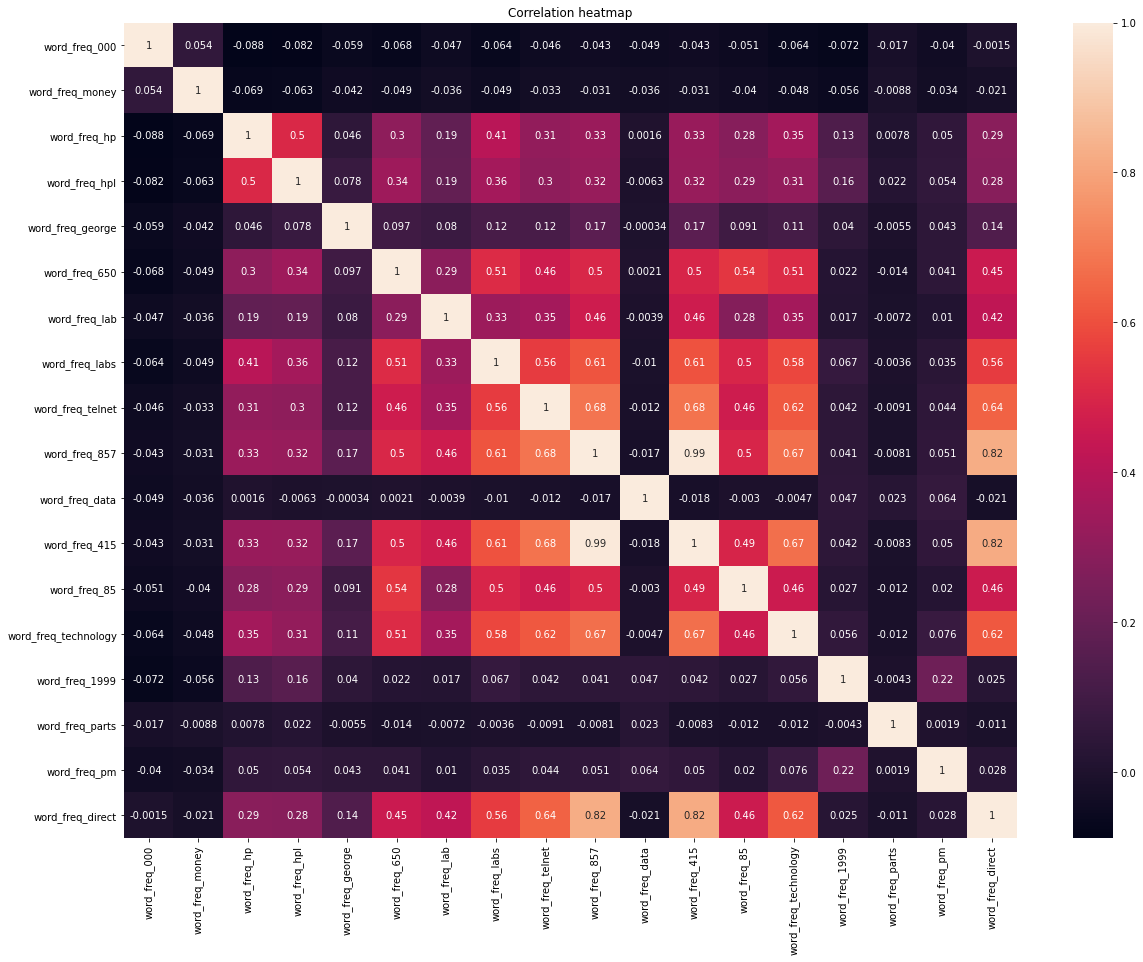

In [33]:
features=df[['word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george', 'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857', 'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct']]
corr=features.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(corr,annot =True)
plt.title('Correlation heatmap')

The variables 'word_freq_857' and  'word_freq_415' are highly correlated, so we will drop them  

In [34]:
# We drop the correlated features
df=df.drop(columns=[ 'word_freq_857','word_freq_415'])

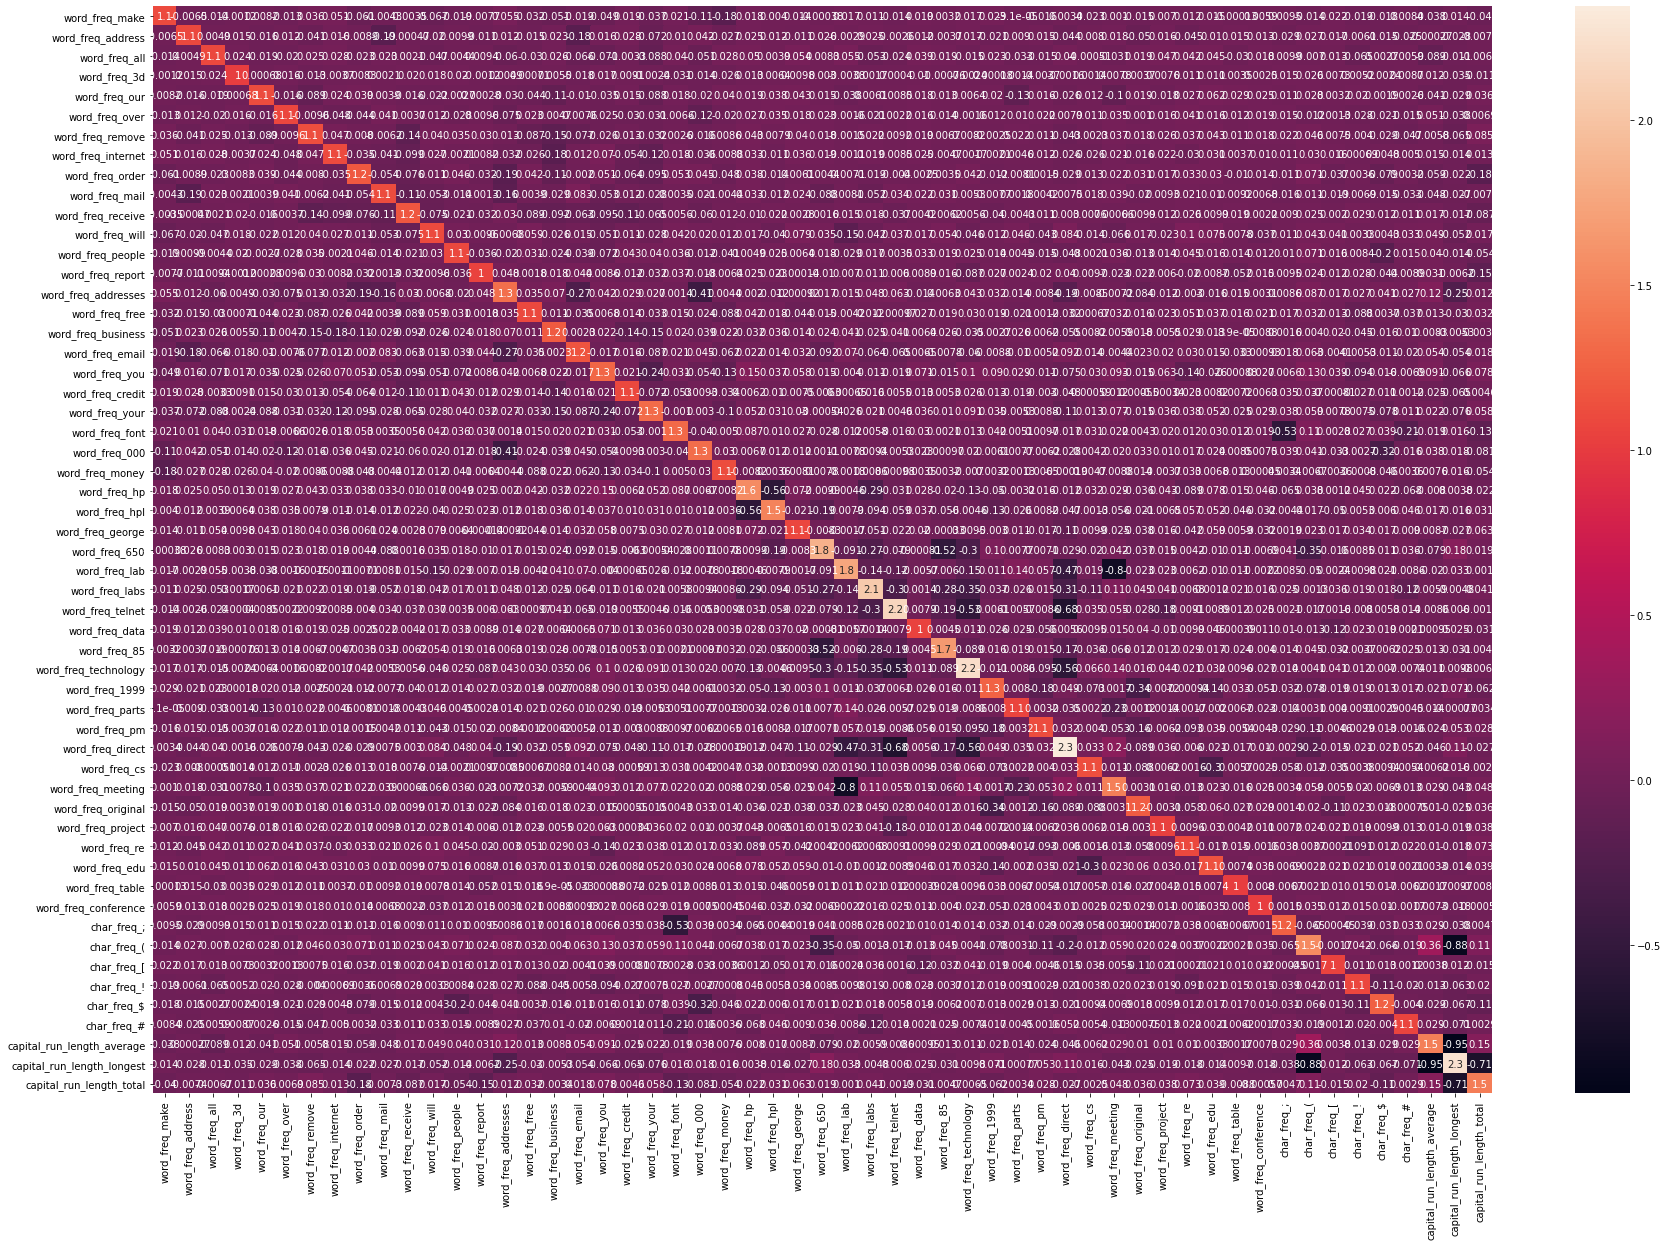

In [35]:
# plot a correlation heatmap and VIF score
corr=df.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (30, 20))
sns.heatmap(vif, annot = True)

The highest VIF score is below 5, meaning that features are not highly correlated, therefore we can continue with the analysis.

Normalization

In [36]:
#Normalizing attributes
from sklearn import preprocessing

# normalize the data attributes
X = preprocessing.normalize(X)
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((3368, 57), (3368,))

In [37]:
#Training and fitting the model
gnb2 = GaussianNB()
gnb2.fit(X1_train,y1_train)
# y_expect = y_test
y1_pred = gnb2.predict(X1_test)

#Checking performance our model with performance metrics.

print('Confusion Matrix')
print(confusion_matrix(y1_test, y1_pred))
print('\n')
print('Classification report')
print(classification_report(y1_test, y1_pred))
print('ROC Score:',roc_auc_score(y1_test, y1_pred))
print("Accuracy:", accuracy_score(y1_test, y1_pred))

Confusion Matrix
[[318 177]
 [ 11 336]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       495
           1       0.65      0.97      0.78       347

    accuracy                           0.78       842
   macro avg       0.81      0.81      0.78       842
weighted avg       0.84      0.78      0.78       842

ROC Score: 0.8053619771199021
Accuracy: 0.7767220902612827


From the confusion matrix,the miscalssification where spam == 1 increases.The number of total miclassification increases as well. From the classification report, we can see that our model doesn't perform so well.
Our model perfomance drops to 80.53% from 84 


Hyperparamer Tuning

In [38]:
#Tuning hyperparameters and transforming features to a normal distribution
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')
X_trans = PowerTransformer().fit_transform(X)
gs_NB.fit(X_trans, y)
gs_NB.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    9.1s finished


{'var_smoothing': 0.0005336699231206307}

In [41]:
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape
#Training and fitting the model
GNB = GaussianNB(var_smoothing=0.0005336699231206307)
GNB.fit(X2_train,y2_train)
print(GNB)
# y_expect = y_test
y3_pred = GNB.predict(X2_test)
print(accuracy_score(y2_test,y3_pred))
#Checking performance our model with performance metrics.

print('Confusion Matrix')
print(confusion_matrix(y2_test, y3_pred))
print('\n')

print('Classification report')
print(classification_report(y2_test, y3_pred))
print('ROC Score:',roc_auc_score(y2_test, y3_pred))
print("Accuracy:", accuracy_score(y2_test, y3_pred))



GaussianNB(priors=None, var_smoothing=0.0005336699231206307)
0.8076009501187649
Confusion Matrix
[[347 148]
 [ 14 333]]


Classification report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       495
           1       0.69      0.96      0.80       347

    accuracy                           0.81       842
   macro avg       0.83      0.83      0.81       842
weighted avg       0.85      0.81      0.81       842

ROC Score: 0.8303321398422263
Accuracy: 0.8076009501187649


Model performs better at 83% with improvement on the misclassifications in 1.  From 177 to 148. Therfore this is the best model to classify spam emails with a Roc-Auc Score of 83 % And 80.76% accuracy score.

## Conclusion
E-mail spam filtering is an important issue in the network security and machine learning techniques. For our study, Gaussian Na¨ıve Bayes classifier Performed well when used with all the features and default hyperparameters.The model accurately classifies spam and non spam emails hence can be used to filter emails with an ROC score of 83%

## Recommendation
- Further data processing procedures and smoothing techniques can be applied to improve the performance of the model.
- Outlier treatment can help in improving model perfomance